In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer
sklearn.__version__

'0.24.2'

In [6]:
params = {
    'criterion' : ['gini', 'entropy'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [1, 2, 3],
    'min_samples_split' : [2, 3]
}
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size= 0.2,
                                                    shuffle=True,
                                                    random_state=200)
dt_model = DecisionTreeClassifier()
grid_tree_model = GridSearchCV(dt_model, param_grid = params, cv =3, refit = True)
grid_tree_model.fit(X_train,y_train)
grid_tree_model.cv_results_

{'mean_fit_time': array([0.00292532, 0.0012517 , 0.00261768, 0.00829792, 0.00147072,
        0.00173537, 0.00102584, 0.00125464, 0.00150752, 0.00141891,
        0.00074704, 0.00076962, 0.0011584 , 0.00088803, 0.00118057,
        0.00065708, 0.00132163, 0.00136662, 0.00122762, 0.00737079,
        0.00270295, 0.0035611 , 0.00199501, 0.00352168]),
 'std_fit_time': array([4.70363919e-04, 7.22274673e-04, 1.32316573e-03, 5.58580945e-03,
        3.46619964e-04, 1.24530247e-03, 2.35065109e-04, 9.33797451e-04,
        4.65538432e-04, 6.48313540e-04, 2.08191196e-04, 1.04288985e-04,
        4.98961019e-04, 2.72001874e-04, 7.16184975e-04, 5.31607497e-05,
        3.64142649e-04, 2.17322774e-04, 1.95611462e-04, 3.54832564e-03,
        7.32741585e-04, 2.76822744e-03, 8.22112282e-04, 3.39924670e-03]),
 'mean_score_time': array([0.00248305, 0.00058015, 0.00097537, 0.00228977, 0.00062776,
        0.00075547, 0.00050688, 0.00044012, 0.00104872, 0.00041032,
        0.00039363, 0.00049233, 0.00044131, 0.00

In [7]:
print('최적의 파라미터 - ', grid_tree_model.best_params_)
print('최고 점수 - ', grid_tree_model.best_score_)

최적의 파라미터 -  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}
최고 점수 -  0.9666666666666667


In [10]:
estimator = grid_tree_model.best_estimator_
estimator

y_pred = estimator.predict(X_test)

print('GridSearchCV 테스트 정확도 - ' , accuracy_score(y_test , y_pred))

print('answer - ' , y_test)

print('prediction - ' , y_pred)


GridSearchCV 테스트 정확도 -  1.0
answer -  [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]
prediction -  [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]


In [12]:
print('피처의 중요도를 시각화 - ')
print('트리 분류 형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표')
print('해당 지표는 0 ~ 1 사이의 값을 가지며 , 0이면 특성이 전혀 고려되지 않을 것 - ')
print('특성의 중요도의 합은 1 이다')


print('feature importance - ' , estimator.feature_importances_)


피처의 중요도를 시각화 - 
트리 분류 형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표
해당 지표는 0 ~ 1 사이의 값을 가지며 , 0이면 특성이 전혀 고려되지 않을 것 - 
특성의 중요도의 합은 1 이다
feature importance -  [0.        0.0083224 0.9916776 0.       ]


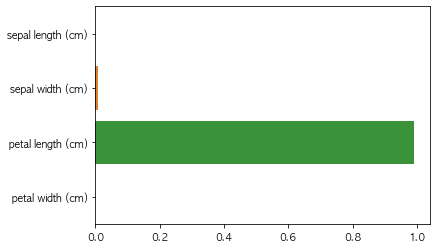

****************************************************************************************************
sepal length (cm) 	 0.0
sepal width (cm) 	 0.008322401365387465
petal length (cm) 	 0.9916775986346126
petal width (cm) 	 0.0


In [14]:
sns.barplot(x= estimator.feature_importances_, y = iris.feature_names)

plt.show()
plt.close()

print('*'*100)
for name, value in zip(iris.feature_names, estimator.feature_importances_):
    print(name, '\t', value)

In [17]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
cancer_frm = pd.DataFrame(data = cancer.data,
                         columns = cancer.feature_names,
                         )
cancer_frm['target'] = cancer.target

In [21]:
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [22]:
print('DecisionTree Estimator - ')
print('train , test : 7 , 3')
print('학습 - 예측 fit , predict')
print('모델 정확도 평가 - accuracy_score')
print()

DecisionTree Estimator - 
train , test : 7 , 3
학습 - 예측 fit , predict
모델 정확도 평가 - accuracy_score



In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.3,
                                                    shuffle= True,
                                                    random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [26]:
cancer_model = DecisionTreeClassifier()
cancer_model.fit(X_train, y_train)
y_pred = cancer_model.predict(X_test)
print('*'*100)
print('answer - ', y_test)
print('pred - ', y_pred)

****************************************************************************************************
answer -  [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]
pred -  [1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]


In [27]:
print('예측 정확도 - ', accuracy_score(y_test, y_pred))

예측 정확도 -  0.9181286549707602


In [ ]:
print('graphvis 트리 시각화 - ')
